Use this notebook to generate some dake data and send requests to the API.

In [1]:
import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

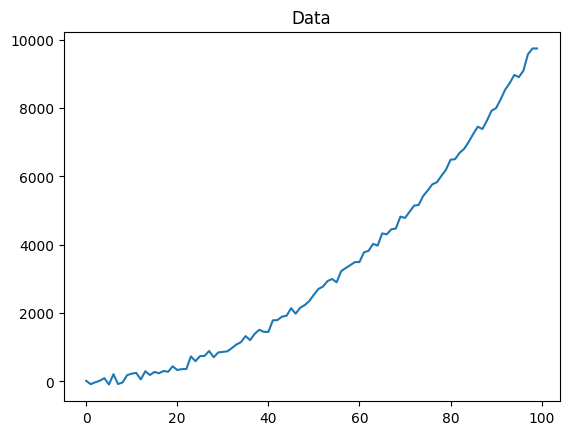

In [20]:
# Generate some data of the form y = a + x + noise, of length n
def generate_linear(n: int, a: float, std: float = 1):
    x = np.arange(n)
    noise = np.random.normal(0, std, n)
    y = a + x + noise
    return x, y


# Generate some data of the form y = a + x**2 + noise, of length n
def generate_exponential(n: int, a: float, std: float = 1):
    x = np.arange(n)
    noise = np.random.normal(0, std, n)
    y = a + x**2 + noise
    return x, y


# Generate some data of the form y = a + sin(x) + noise, of length n
def generate_sin(n: int, a: float, std: float = 1):
    FREQUENCY = 0.2
    x = np.arange(n)
    noise = np.random.normal(0, std, n)
    y = a + np.sin(FREQUENCY * x) + noise
    return x, y


# Generate some data of the form y = a + log(x) + noise, of length n
def generate_log(n: int, a: float, std: float = 1):
    x = np.arange(n)
    x = np.where(x == 0, 1, x)  # Replace all 0s in x with 1s
    noise = np.random.normal(0, std, n)
    y = a + np.log(x) + noise
    return x, y


# _, y = generate_linear(100, 1, 0.5)
_, y = generate_exponential(100, 1, 100)
# _, y = generate_sin(100, 1, 0.1)
# _, y = generate_log(100, 1, 0.1)

# Plot the data
plt.plot(y)
plt.title('Data')
plt.show()


In [23]:
# Run a POST request to the server
payload = {
    'model': 'cv',
    'horizon': 5,
    'series': y.round(2).tolist()
}

payload_json = json.dumps(payload)

url = 'http://localhost:8000/forecast'
response = requests.post(url, json=payload)
response_json = response.json()
choice_model = response_json['model']
predictions = response_json['predictions']

print(response.status_code, response.reason)


200 OK


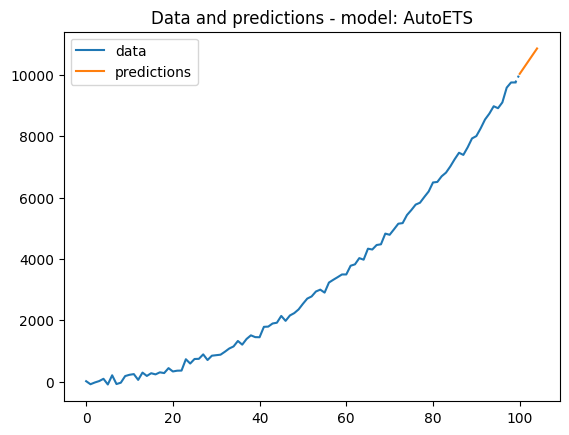

In [25]:
# Reindex the data
y_plot = pd.Series(y)
predictions = pd.Series(predictions, index=np.arange(len(y_plot), len(y_plot) + len(predictions)))

# y_plot = pd.concat([y_plot, predictions[:1]], axis=0)

# Include a vertical line to show where the data ends and the predictions begin
# plt.axvline(predictions.index[0], color='gray', linestyle=':')

bridge = np.array([y_plot.iloc[-1], predictions.iloc[0]])
bridge = pd.Series(bridge, index=[len(y_plot) - 1, len(y_plot)])

# Plot both the data and the predictions (in different colors)
plt.plot(y_plot, label='data', color='tab:blue')

# If there is only one prediction, plot it as a point
if len(predictions) == 1:
    plt.plot(len(y_plot), predictions, 'o', label='prediction')
else:
    plt.plot(predictions, label='predictions', color='tab:orange')

    # Include a marker on the first prediction
    # plt.plot(predictions[:1], 'o', color='tab:orange', markersize=5)

plt.plot(bridge, color='tab:blue', linestyle=':')

plt.legend()


plt.title(f'Data and predictions - model: {choice_model}')
plt.show()
